In [1]:
import pickle
from pathlib import Path
from itertools import islice

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def top_to_list(topology):
    return [int(n) for n in topology.split("->")]

def top_to_filename(topology):
    return topology.replace('->', '-').replace(' ', '')

def num_layers(topology):
    return len(top_to_list(topology)) - 1

In [3]:
this_dir = Path().absolute()
runs = this_dir/'runs'
figures = this_dir/'figures'

if not runs.exists():
    runs.mkdir()
    
if not figures.exists():
    figures.mkdir()

/home/eric/Code/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


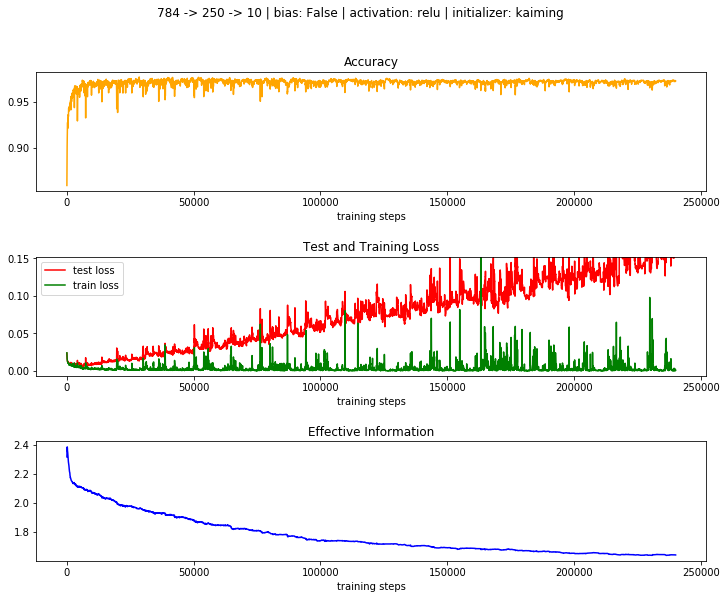

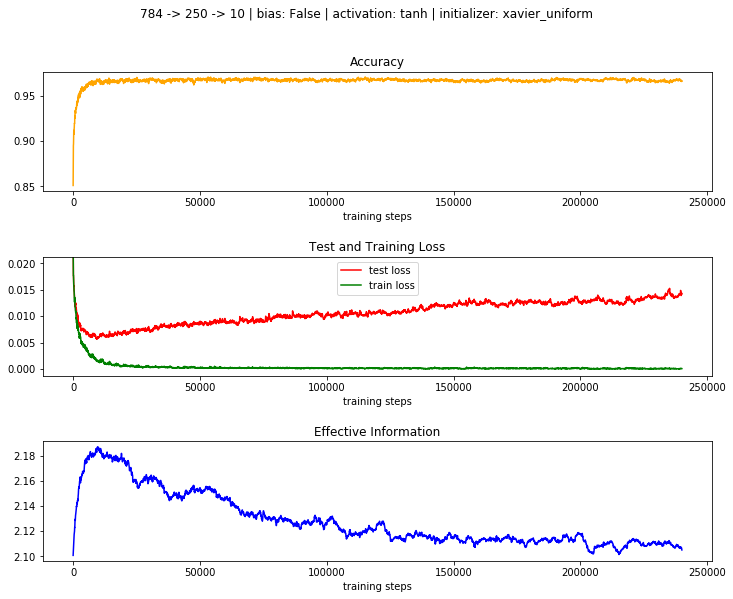

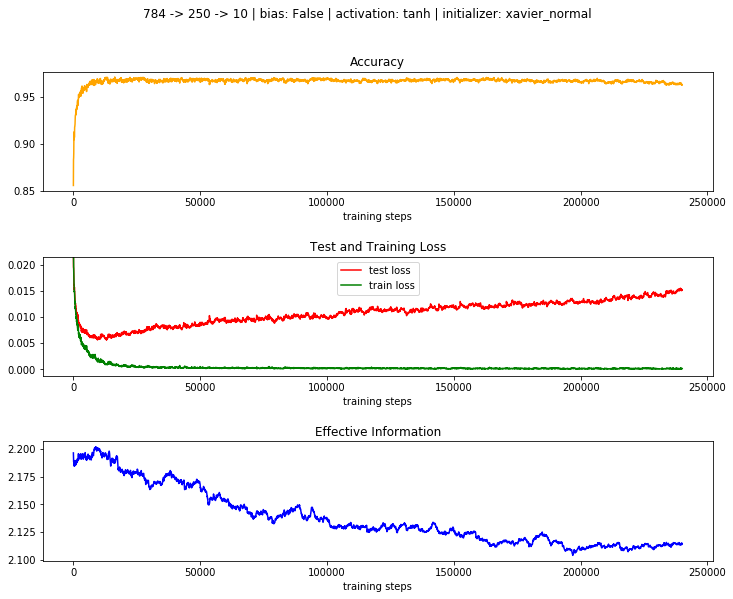

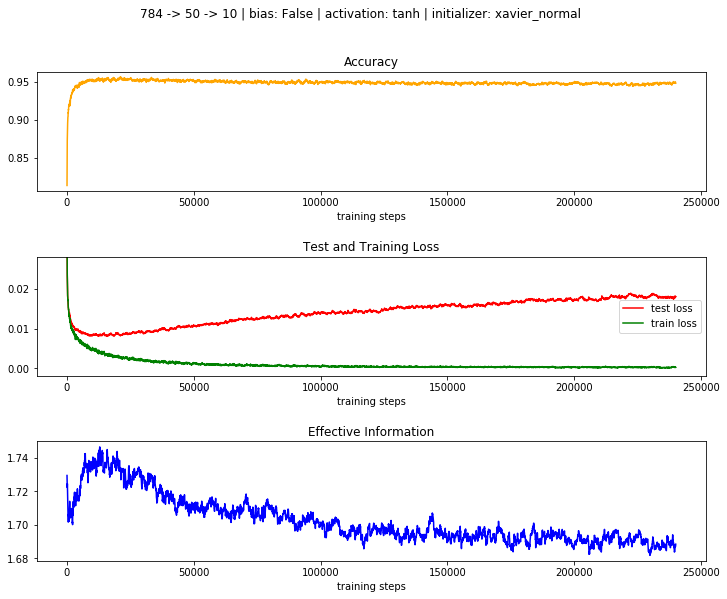

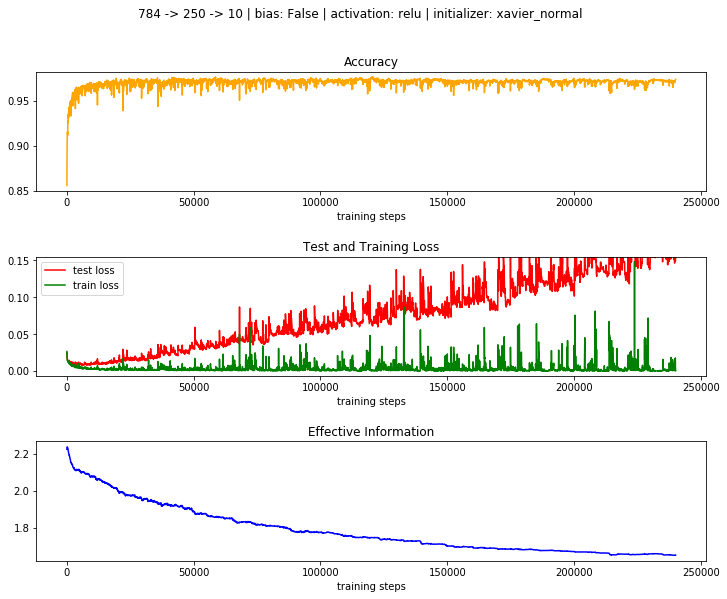

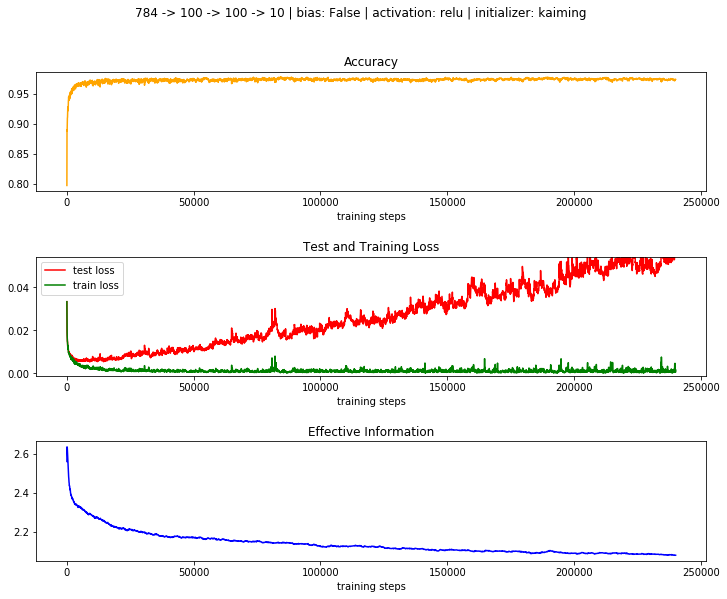

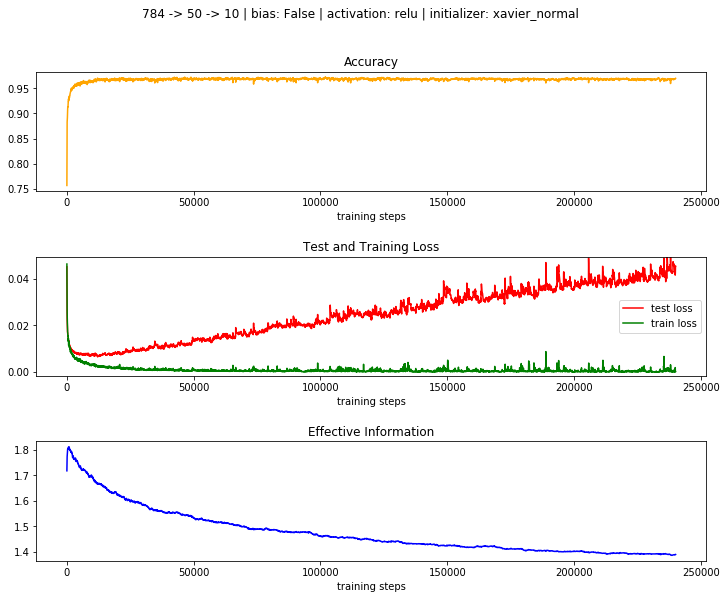

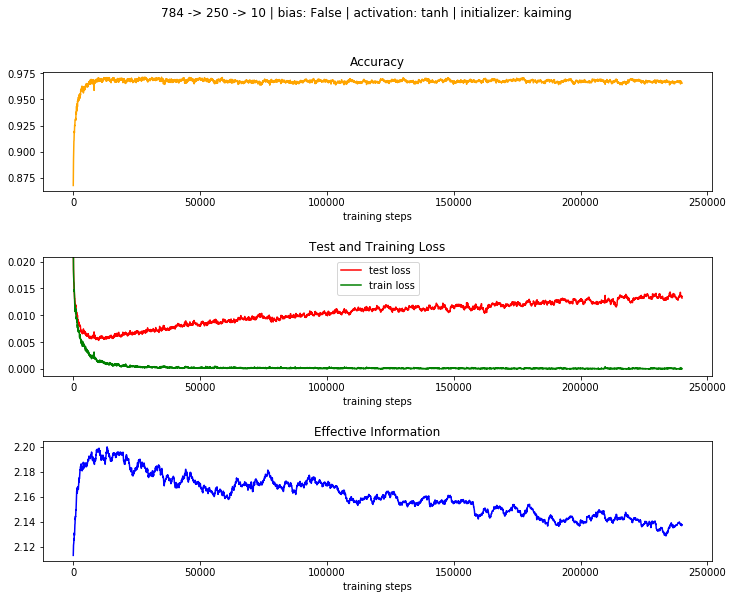

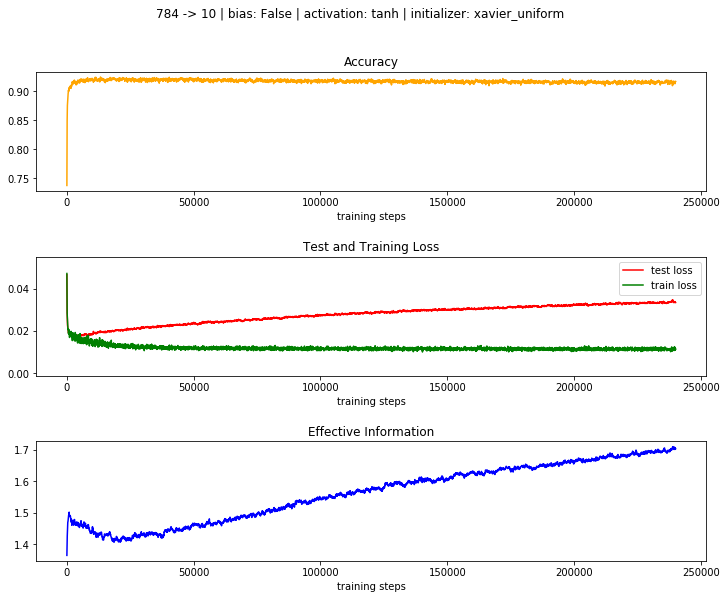

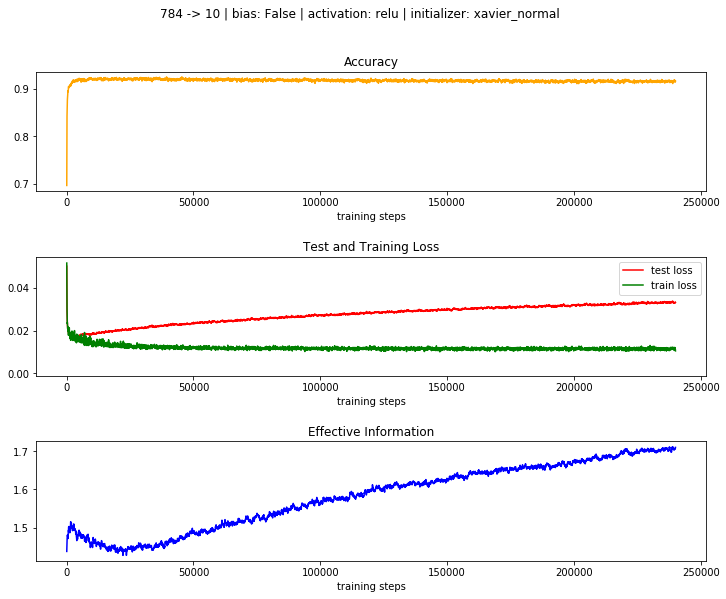

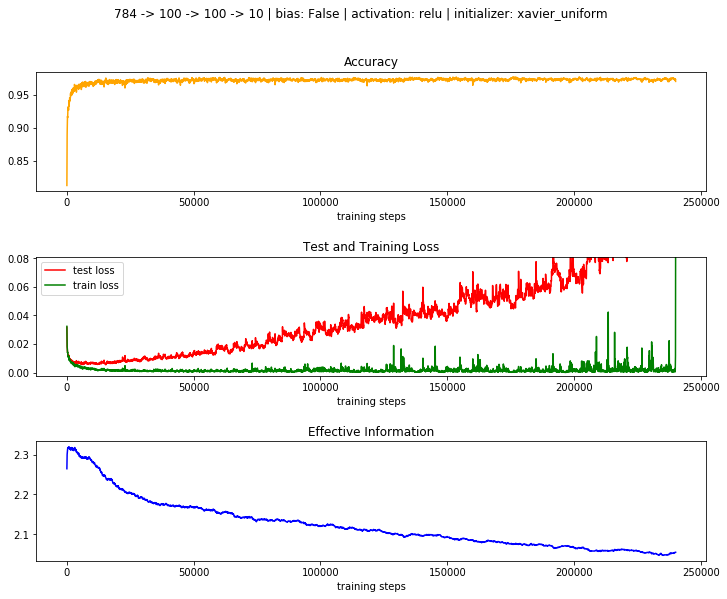

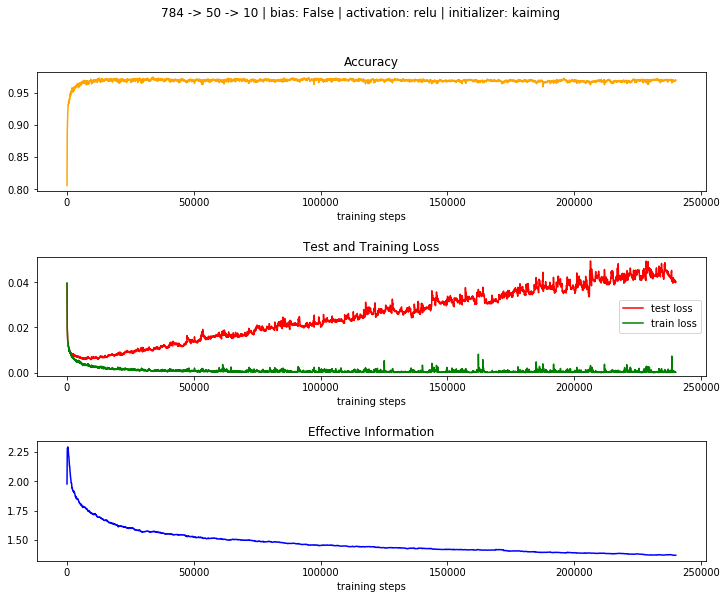

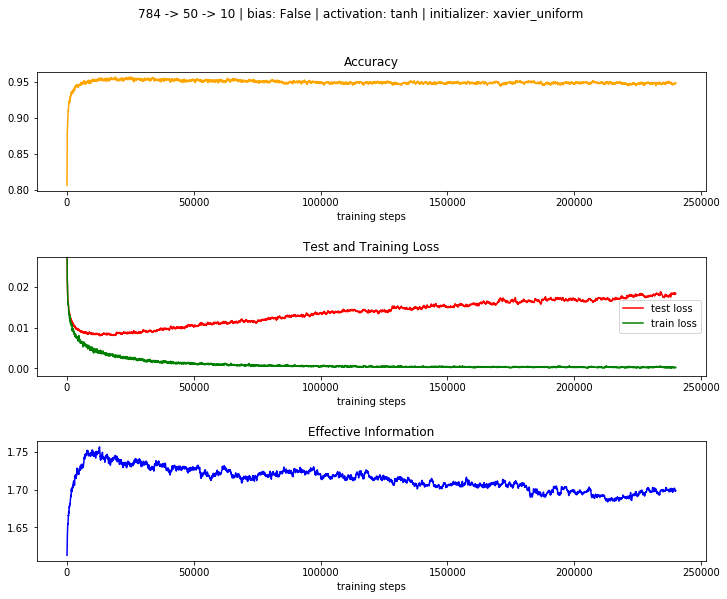

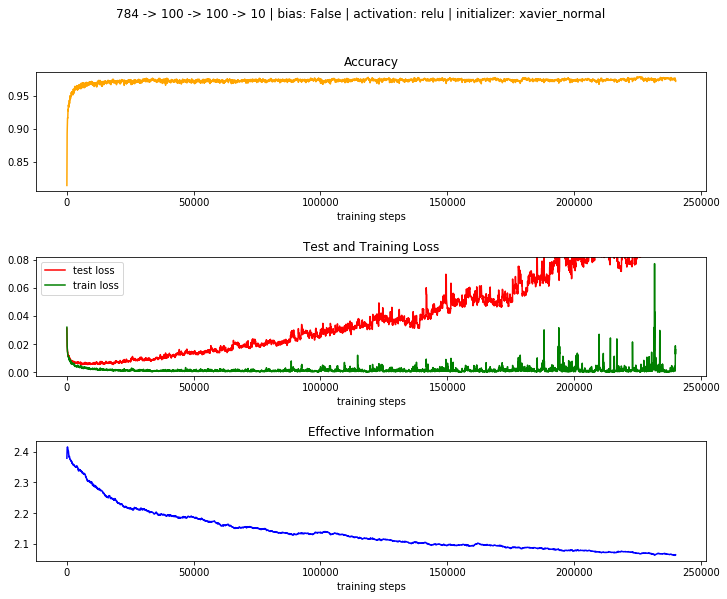

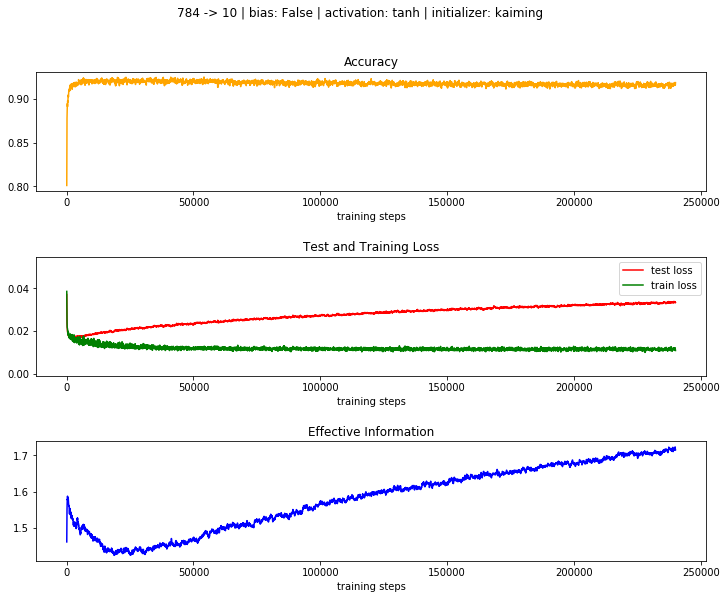

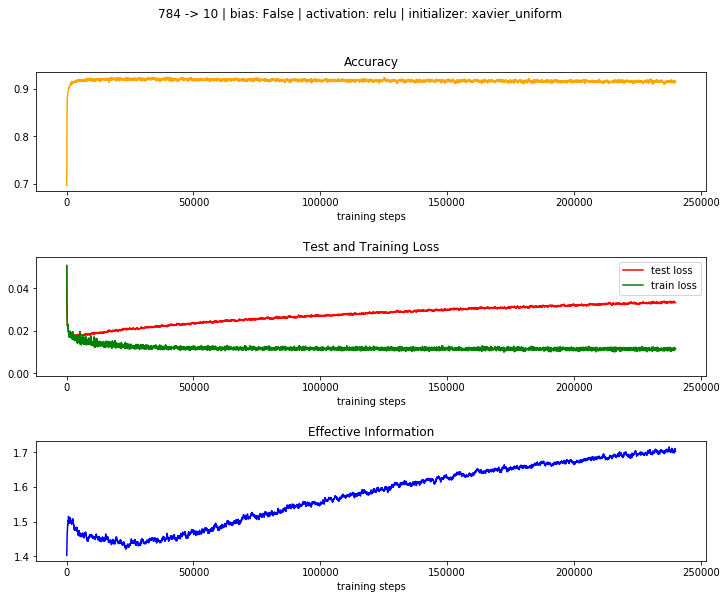

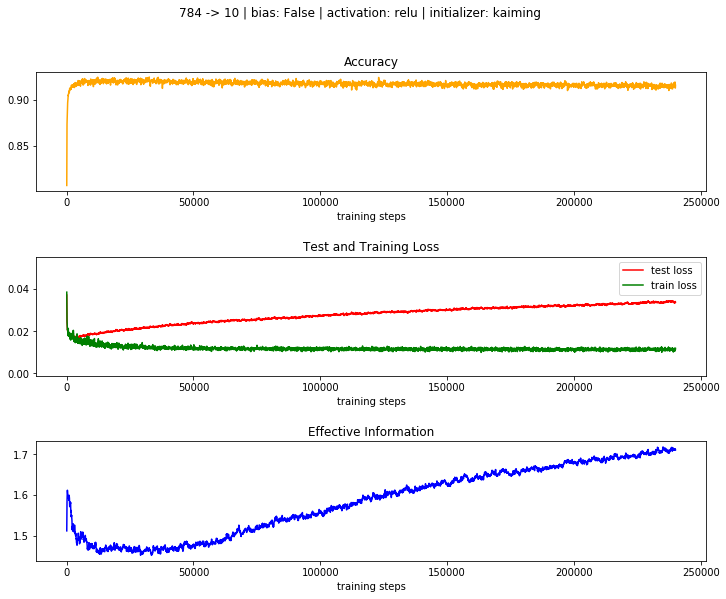

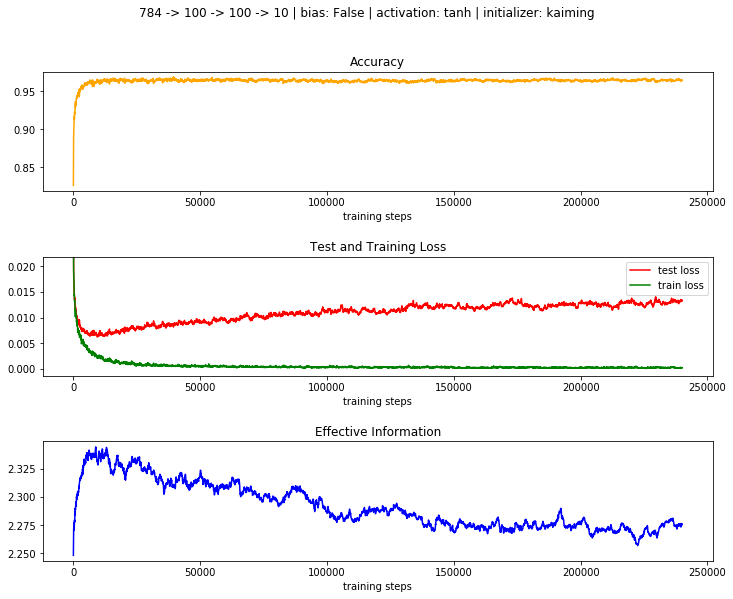

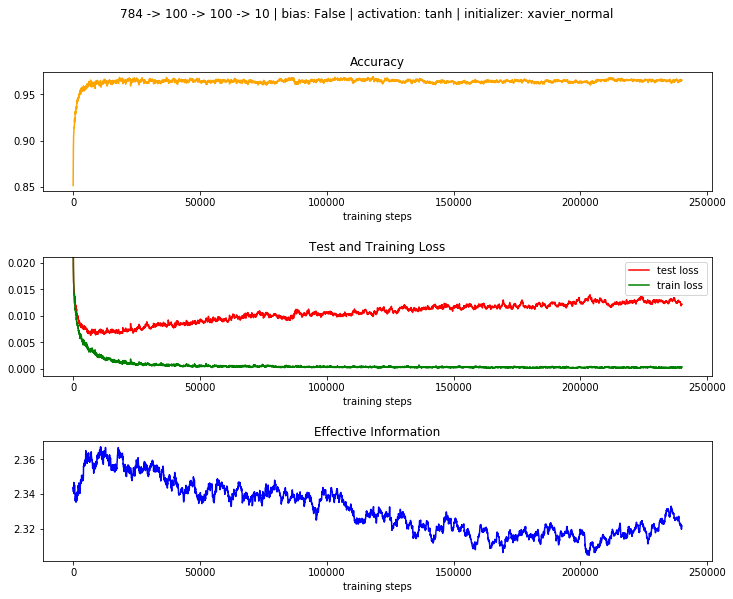

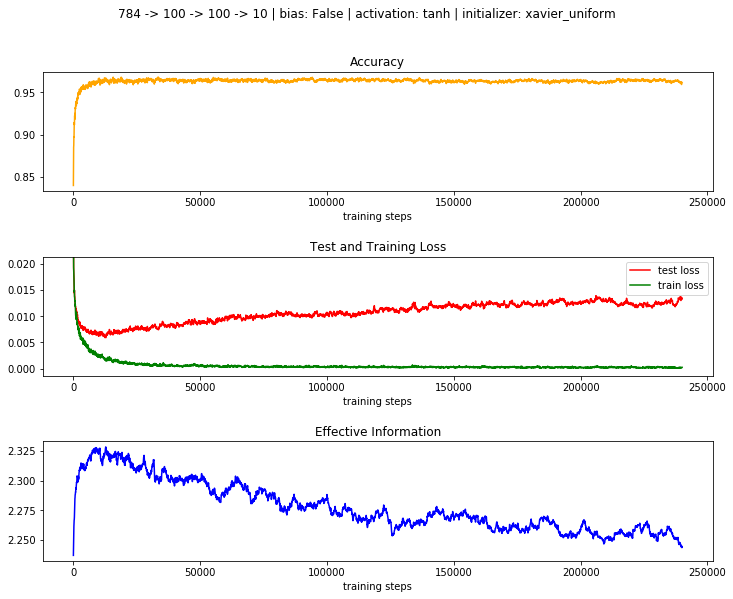

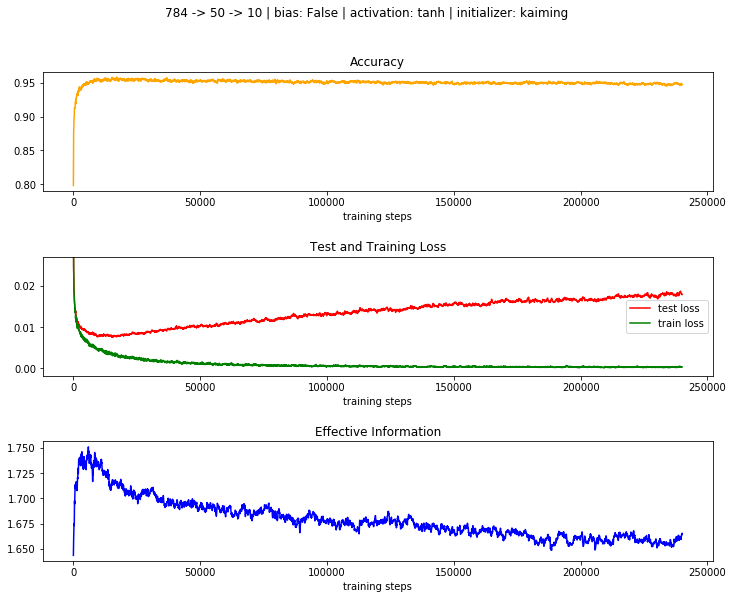

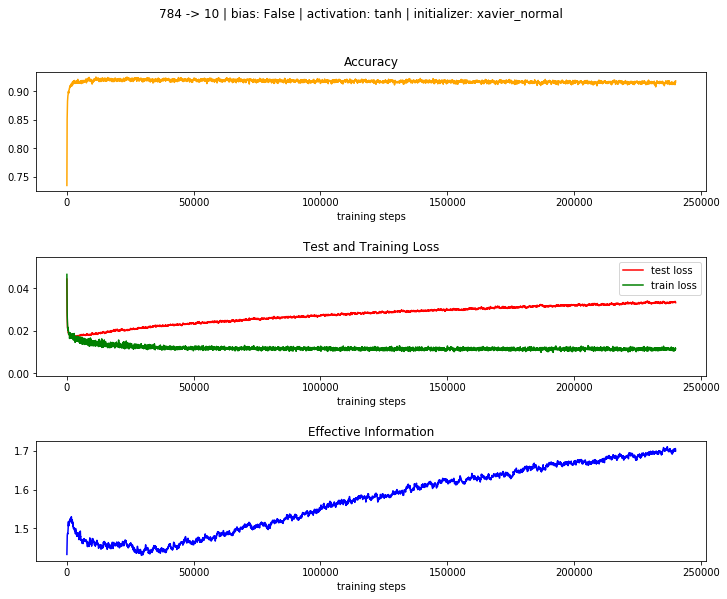

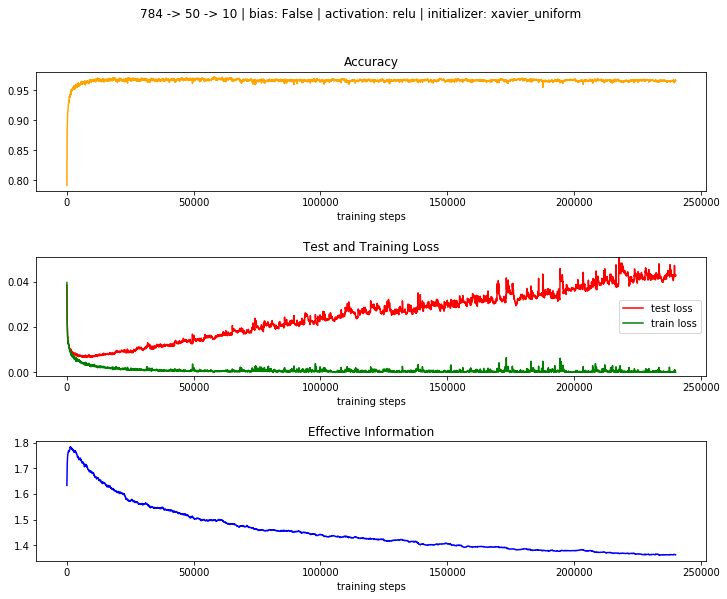

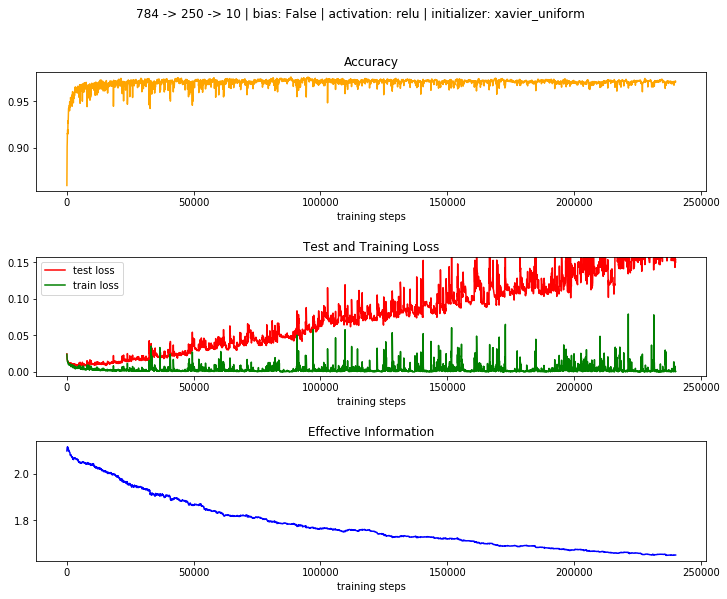

In [4]:
for experiment in runs.glob('*'):
    with open(experiment/'data.pkl', "rb") as f:
        params, data = pickle.load(f)

    topology, bias, activation, initializer = params   
    num_batches_data, eis_data, losses_data, accuracies_data = data
    train_losses, test_losses = zip(*losses_data)
    
    train_losses, test_losses = zip(*losses_data)
    fig = plt.figure(figsize=(12, 9))
    topology, bias, activation, initializer = params
    plt.suptitle(f"{topology} | bias: {bias} | activation: {activation} | initializer: {initializer}")

    plt.subplot(3, 1, 1)
    plt.plot(num_batches_data, accuracies_data, color='orange')
    plt.xlabel("training steps")
    plt.title("Accuracy")

    plt.subplot(3, 1, 2)
    plt.plot(num_batches_data, test_losses, color='red', label="test loss")
    plt.plot(num_batches_data, train_losses, color='green', label="train loss")
    yavg_test = np.mean(test_losses)
    yavg_train = np.mean(train_losses)
    plt.ylim(yavg_train*0.01 - np.std(train_losses), yavg_test*2)
    plt.xlabel("training steps")
    plt.legend()
    plt.title("Test and Training Loss")

    plt.subplot(3, 1, 3)
    plt.plot(num_batches_data, eis_data, color='blue')
    plt.xlabel("training steps")
    plt.title("Effective Information")

    plt.subplots_adjust(hspace=0.55)
    
    layers = num_layers(topology)
    subfolder = figures / f"{layers}layers"
    if not subfolder.exists():
        subfolder.mkdir()
    filename = "{}_{}_{}_{}".format(top_to_filename(topology), bias, activation, initializer)
    plt.savefig(subfolder / filename, dpi=300)

In [5]:
# train_losses, test_losses = zip(*losses_data)
# fig = plt.figure(figsize=(12, 9))
# topology, bias, activation, initializer = params
# plt.suptitle(f"{topology} | bias: {bias} | activation: {activation} | initializer: {initializer}")

# plt.subplot(3, 1, 1)
# plt.plot(num_batches_data, accuracies_data, color='orange')
# plt.xlabel("training steps")
# plt.title("Accuracy")

# plt.subplot(3, 1, 2)
# plt.plot(num_batches_data, test_losses, color='red', label="test loss")
# plt.plot(num_batches_data, train_losses, color='green', label="train loss")
# yavg_test = np.mean(test_losses)
# yavg_train = np.mean(train_losses)
# plt.ylim(yavg_train*0.01 - np.std(train_losses), yavg_test*2)
# plt.xlabel("training steps")
# plt.legend()
# plt.title("Test and Training Loss")


# plt.subplot(3, 1, 3)
# plt.plot(num_batches_data, eis_data, color='blue')
# plt.xlabel("training steps")
# plt.title("Effective Information")

# plt.subplots_adjust(hspace=0.55)

# # plt.savefig(f"plots/different-inits/{init}", dpi=300)
